<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/AirbnbBookingAnalysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## OVERVIEW ON DATAFRAME 

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#importing Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# importing dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Capstone_One_EDA/Airbnb/Copy of Airbnb NYC 2019.csv')

In [63]:
#to look at first five record
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [64]:
# to look last five records
data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [65]:
# To know the size of dataframe
data.shape

(48895, 16)

In [66]:
# to see what are  the feature
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [67]:
# preliminary details over dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [68]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### DEALING WITH MISSING VALUES

In [69]:
# Checking for the null values in each features
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [70]:
# Dropping down the unnecessary feature
data.drop(['id','name','host_name','last_review'],axis=1,inplace=True)

### Data Formatting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feea95b89d0>]],
      dtype=object)

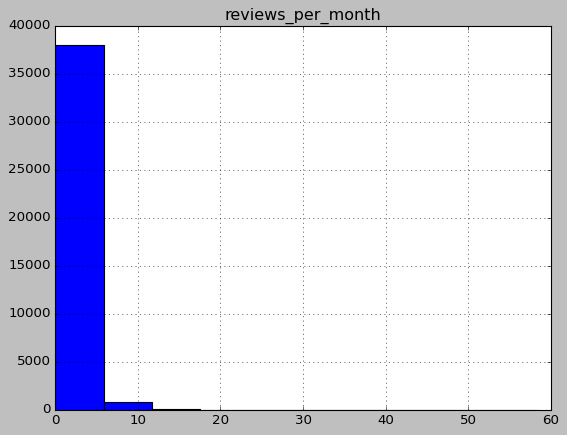

In [71]:
# checking for skewness in selected features
data.hist(column=['reviews_per_month'])

In [72]:
# Data Imputation
data['reviews_per_month'].fillna(0,inplace=True)
# as not available data form reviews per month, here i decided to replace them with zero reviews

In [73]:
# checking whether we are done with null values
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [74]:
# size of data after dealing with missing values
data.shape

(48895, 12)

### Dealing with duplicate values

In [75]:
#Checking for duplicate values
data.duplicated().any()

False

## HYPOTHESIS

### 1. Neighbourhoood Groups vs Availability_365

In [76]:
# sns.displot(data=data, x='neighbourhood_group',
#             y='availability_365',palette="dark")
# plt.title('Neighbourhood_group vs Availabilty_365')
# plt.show()
data1 = data.copy()

data1 = data1.groupby('neighbourhood_group', as_index= False)['availability_365'].mean()

data1['availability_365'] = data1['availability_365'].astype(int)
# for better visualization converting float value into int

<BarContainer object of 5 artists>

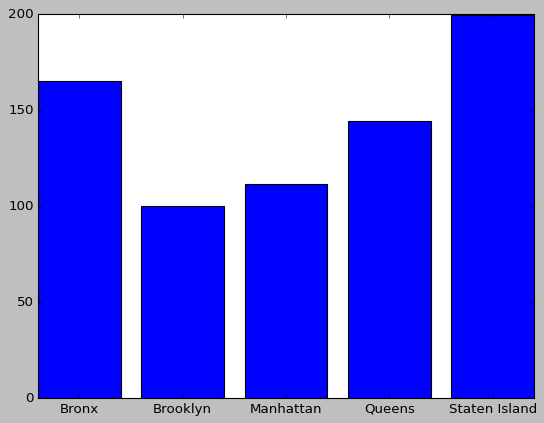

In [77]:
plt.bar(data1.neighbourhood_group, data1.availability_365)

### 2. Neighbourhood Group Percentages

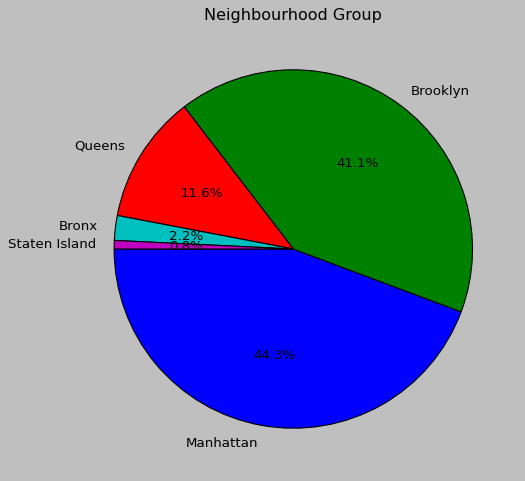

In [78]:
plt.style.use('classic')

plt.figure(figsize=(13,7))


plt.pie(data.neighbourhood_group.value_counts(), 
        labels=data.neighbourhood_group.value_counts().index,
        autopct='%1.1f%%', startangle=180)

plt.title("Neighbourhood Group")

plt.show()

### 3. Type of Room

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


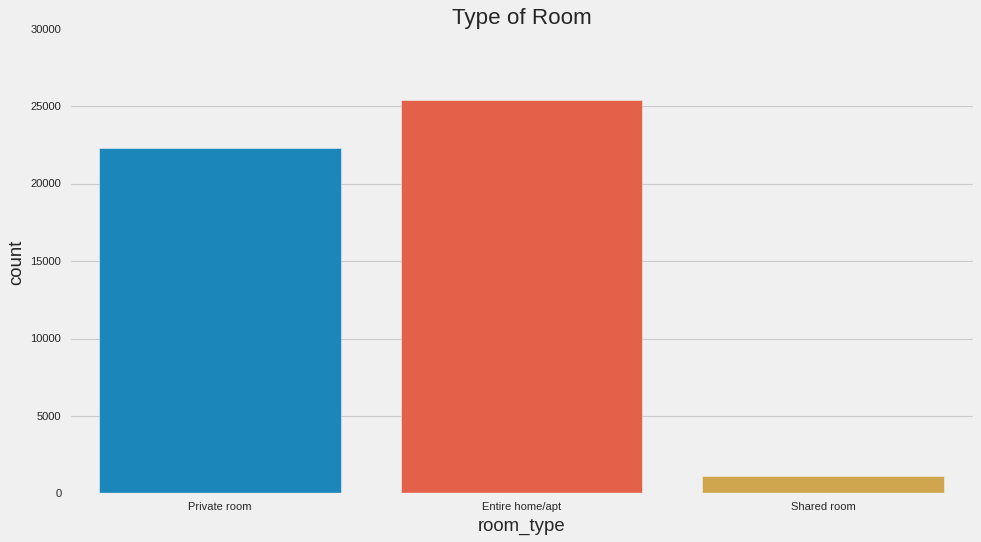

In [85]:
# Here we can check which type of rooms are occupied most
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(data.room_type)
plt.show()

### 4. Neighbourhood Groups vs Room Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


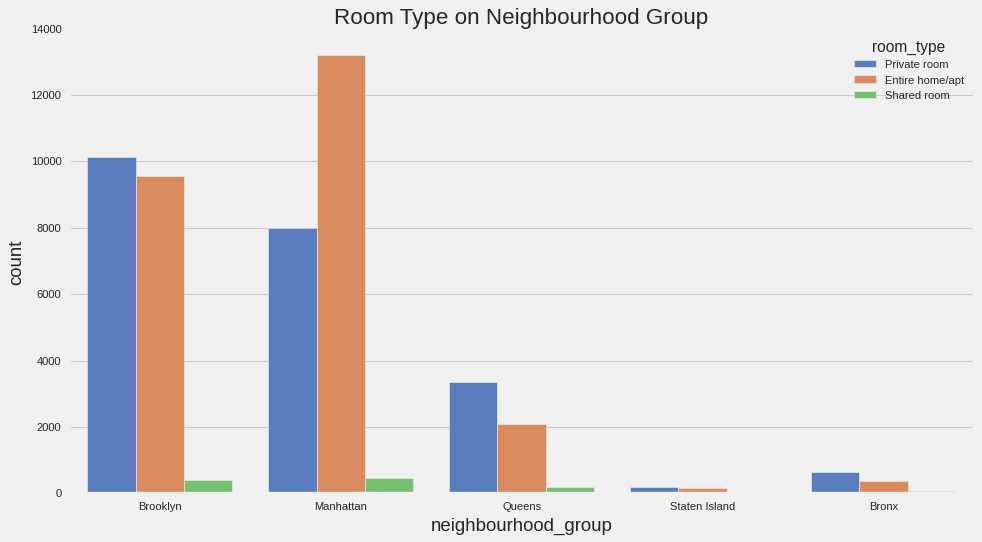

In [82]:
# Here we will check which type of rooms occupied most in which neighbourhood group
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(data.neighbourhood_group,hue=data.room_type, palette="muted")
plt.show()

### 5. Neighbourhood Groups vs price

In [83]:
# before going to visualize we need to change dataframe as per requirement ,
# so we grouped neighbourhood groups and took mean price repectively to form new dataframe
data_1 = data.groupby('neighbourhood_group',as_index = False)['price'].mean()

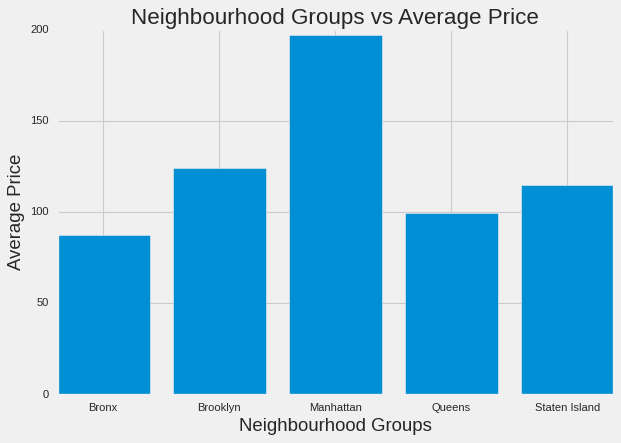

In [84]:
plt.bar(data_1.neighbourhood_group, data_1.price)
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price')
plt.title('Neighbourhood Groups vs Average Price')
plt.show()

# CONCLUSION


## As a part of project we have cleaned the dataframe and perform some anlyasis to draw some insights.

## we have dealed with misssing values, data imputations, dropping of unneccesary features. In this dataset we have not got a chance to deal with outliers which is also a part of data cleaning.

## I feel data cleaning process is heart of the Exploratory Data Analysis